In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('spam.csv', encoding = 'latin=1')

print(df.head())
df.shape

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


(5572, 5)

In [7]:
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(
                                                                    df.v2,
                                                                    df.v1,
                                                                    test_size = 0.2,
                                                                    random_state = 0)
print(data_train.head())
print(labels_train.head())

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
Name: v2, dtype: object
1114    ham
3589    ham
3095    ham
1012    ham
3320    ham
Name: v1, dtype: object


In [10]:
#count words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

data_train_count = vectorizer.fit_transform(data_train)
data_test_count = vectorizer.transform(data_test) #use data_train's features

print (data_train_count.shape)
print (vectorizer.vocabulary_)
print (data_test_count.shape)

(4457, 7612)
{'no': 4700, 'this': 6717, 'is': 3682, 'kallis': 3818, 'home': 3415, 'ground': 3197, 'amla': 905, 'town': 6866, 'durban': 2459, 'am': 897, 'in': 3575, 'escape': 2599, 'theatre': 6683, 'now': 4750, 'going': 3117, 'to': 6799, 'watch': 7254, 'kavalan': 3830, 'few': 2769, 'minutes': 4418, 'we': 7274, 'walked': 7218, 'from': 2967, 'my': 4576, 'moms': 4477, 'right': 5673, 'on': 4841, 'stagwood': 6309, 'pass': 5006, 'winterstone': 7392, 'left': 3991, 'victors': 7137, 'hill': 3371, 'address': 780, 'lt': 4170, 'gt': 3204, 'dunno': 2458, 'they': 6701, 'close': 1815, 'oredi': 4890, 'not': 4737, 'ìï': 7604, 'ma': 4211, 'fan': 2719, 'yo': 7557, 'im': 3549, 'by': 1552, 'work': 7450, 'its': 3698, 'ur': 7063, 'luck': 4175, 'love': 4150, 'someone': 6179, 'fortune': 2907, 'the': 6681, 'one': 4845, 'who': 7354, 'loves': 4158, 'but': 1538, 'he': 3306, 'also': 889, 'knows': 3886, 'about': 723, 'lunch': 4182, 'menu': 4367, 'only': 4851, 'da': 2120, 'know': 3883, 'oh': 4817, 'yeah': 7535, 'and':

In [15]:
#simple example
example = ['I loved you, you were perfect', 'Now changed']

vect = CountVectorizer()

result = vect.fit_transform(example)

print(result)
print(vect.vocabulary_)

  (0, 3)	1
  (0, 4)	1
  (0, 5)	2
  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
{'loved': 1, 'you': 5, 'were': 4, 'perfect': 3, 'now': 2, 'changed': 0}


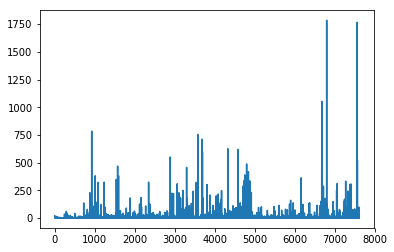

,occurrences,term,frequency
6799,1785,to,0.027950
7562,1767,you,0.027668
6681,1052,the,0.016472
923,784,and,0.012276
3575,755,in,0.011822


In [24]:
#plot vectorizer
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences': data_train_count.toarray().sum(axis = 0)})

word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

plt.plot(word_freq_df.occurrences)
plt.show()

word_freq_df_sort = word_freq_df.sort_values(by = ['occurrences'], ascending=False)
word_freq_df_sort.head()

In [26]:
print (data_train_count.shape)
print (data_test_count.shape)
print (labels_train.shape)
print (labels_train.head())

(4457, 7612)
(1115, 7612)
(4457,)
1114    ham
3589    ham
3095    ham
1012    ham
3320    ham
Name: v1, dtype: object


In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(data_train_count, labels_train)
predictions = clf.predict(data_test_count)
print(predictions)

['ham' 'ham' 'ham' ..., 'ham' 'ham' 'ham']


In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

print(accuracy_score(labels_test, predictions))
print(classification_report(labels_test, predictions))
print(confusion_matrix(labels_test, predictions))

cross_val = cross_val_score(clf, data_train_count, labels_train, cv=20, scoring='accuracy')
print(cross_val)
print(np.mean(cross_val))

0.987443946188
             precision    recall  f1-score   support

        ham       0.99      1.00      0.99       949
       spam       0.99      0.93      0.96       166

avg / total       0.99      0.99      0.99      1115

[[947   2]
 [ 12 154]]
[ 0.99553571  0.97309417  0.96860987  0.97757848  0.97757848  0.98654709
  0.99103139  0.99103139  0.98206278  0.98654709  0.98206278  0.98654709
  0.98206278  0.98206278  0.97309417  0.99103139  0.96846847  0.97747748
  0.99099099  0.98648649]
0.982495042087
